In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing ifnormation about attacks
attacks = pd.read_csv('Project/DataSets/Data_Adult/Metrics_results/attack_rates.csv',delimiter=',',index_col=0)
attacks = attacks.rename(columns={'Unnamed: 1':'Attack'})

In [ ]:
# Extracting value and ci into separate columns
attacks['value_risk'] = attacks['Risk'].str.extract(r'value=(\d+\.\d+)')
attacks['value_risk'] = attacks['value_risk'].astype(float)
attacks['ci'] = attacks['Risk'].str.extract(r'ci=\((.+?)\)')
attacks[['ci_lower', 'ci_upper']] = attacks['ci'].str.split(', ', expand=True).astype(float)

attacks.drop(['Risk', 'ci'], axis=1, inplace=True)

In [12]:
# Extracting value and error for attack_rate
attacks['attack_rate_value'] = attacks['attack_rate '].str.extract(r'value=(\d+\.\d+)').astype(float)
attacks['attack_rate_error'] = attacks['attack_rate '].str.extract(r'error=(\d+\.\d+)').astype(float)

# Extracting value and error for baseline_rate
attacks['baseline_rate_value'] = attacks['baseline_rate'].str.extract(r'value=(\d+\.\d+)').astype(float)
attacks['baseline_rate_error'] = attacks['baseline_rate'].str.extract(r'error=(\d+\.\d+)').astype(float)

# Extracting value and error for control_rate
attacks['control_rate_value'] = attacks['control_rate'].str.extract(r'value=(\d+\.\d+)').astype(float)
attacks['control_rate_error'] = attacks['control_rate'].str.extract(r'error=(\d+\.\d+)').astype(float)

# Drop the original rate columns if no longer needed
attacks.drop(columns=['attack_rate ', 'baseline_rate', 'control_rate'], inplace=True)
df=attacks

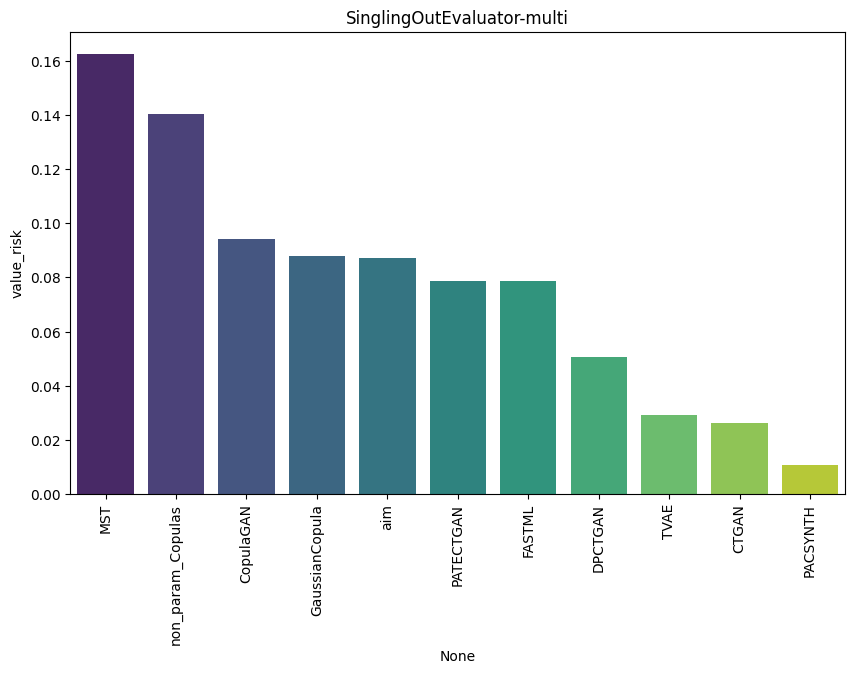

In [16]:
#Making a bar plot, considering attack = SinglingOutEvaluator-multi, for each model, ploting the value of value risk
data=df[df['Attack']=='SinglingOutEvaluator-multi']
data=data.sort_values(by='value_risk',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.barplot(x=data.index,y='value_risk',data=data,palette='viridis')
plt.xticks(rotation=90)
plt.title('SinglingOutEvaluator-multi')
plt.show()


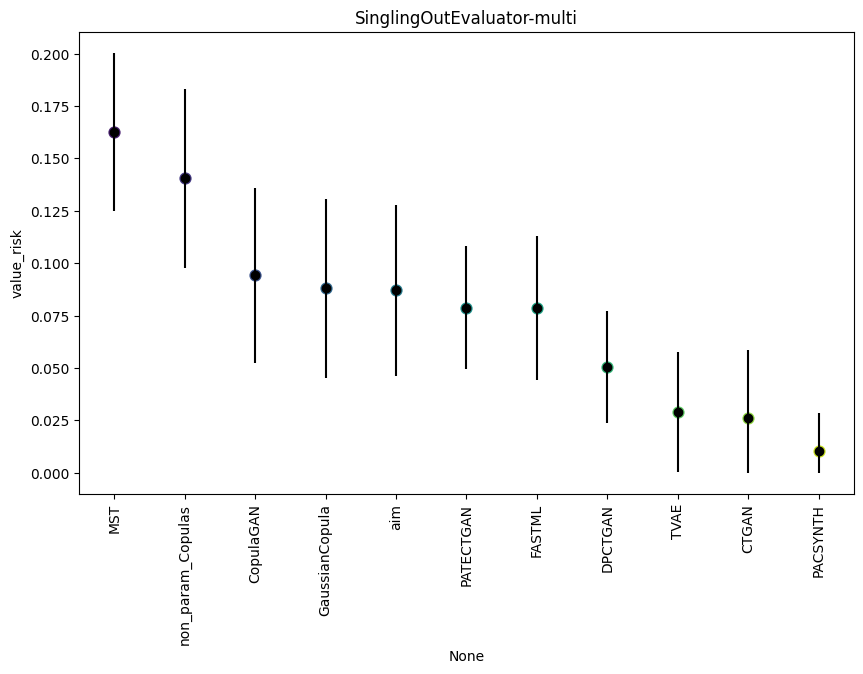

In [17]:
#Plotting the risk value considering attack = SinglingOutEvaluator-multi, for each model, ploting the value of value risk and the confidence interval
# It will be a point plot, usign the value of value_risk as the point and the ci_lower and ci_upper as the error bars
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.pointplot(x=data.index,y='value_risk',data=data,palette='viridis',ax=ax)
plt.xticks(rotation=90)
plt.title('SinglingOutEvaluator-multi')
plt.errorbar(data.index,data['value_risk'],yerr=(data['value_risk']-data['ci_lower'],data['ci_upper']-data['value_risk']),fmt='o',color='black')
plt.show()

In [24]:
#Getting a generalized inference risk
inference_df=pd.read_csv('Project/DataSets/Data_Adult/Metrics_results/inference_risk_rates.csv',delimiter=',')
inference_df.columns=['Secret','FASTML','CTGAN','GaussianCopula','TVAE','CopulaGAN','AIM','DPCTGAN','PATECTGAN','PACSYNTH','MST','non_param_Copulas']
#Setting secret columns as the index
inference_df.set_index('Secret',inplace=True)

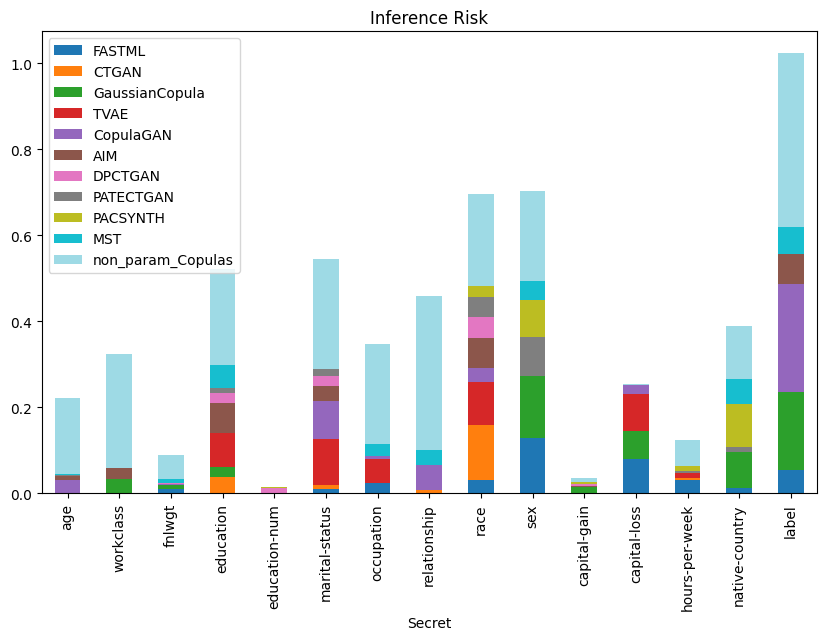

In [35]:
#Making a barplot
inference_df.plot(kind='bar',figsize=(10,6), stacked=True ,colormap='tab20')
plt.xticks(rotation=90)
plt.title('Inference Risk')
plt.show()


### Plotting results from epsilon variations

In [3]:
#Reading a json file with the results of the attack
import json
with open('hpc_workload/Privacy/results/results_attacks.json') as f:
    attack_results = json.load(f)

In [4]:
def get_attack_results(attack_results, attack_name):
    attack_results_df = pd.DataFrame(attack_results)
    attack_results_df=attack_results_df.sort_index()
    
    models=list(attack_results_df.columns)
    epsilons=list(attack_results_df.index)

    # Plot mean lines and fill between upper and lower bounds for each i
    for i in models:
        temp=attack_results_df[i]
        risk_values =[]
        lower_bounds = []
        upper_bounds = []
        for epsilon in epsilons:
            data_str=temp[epsilon]
            data=pd.DataFrame(json.loads(data_str))
            risk_values.append(data['Risk'][attack_name][0])
            lower_bounds.append(data['Risk'][attack_name][1][0])
            upper_bounds.append(data['Risk'][attack_name][1][1])
        plt.plot(np.arange(len(risk_values)), risk_values, marker='o', label=i)
        plt.fill_between(np.arange(len(risk_values)), lower_bounds, upper_bounds, alpha=0.4) 
        # plt.plot(np.arange(len(mean_values[:, i])), mean_values[:, i], marker='o', label=models[i])
        # plt.fill_between(np.arange(len(mean_values[:, i])), lower_bounds[i], upper_bounds[i], alpha=0.4)
        
    plt.xlabel(r'$\epsilon$')
    plt.xticks(np.arange(len(epsilons)), epsilons)
    plt.ylabel('Risk')
    plt.title(attack_name)
    plt.legend()
    plt.show()
    

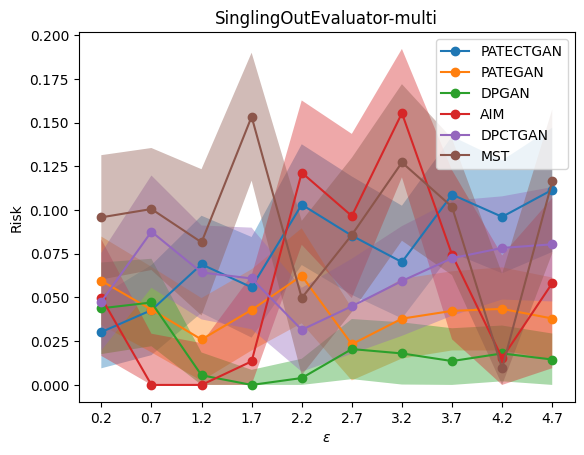

In [14]:
get_attack_results(attack_results, 'SinglingOutEvaluator-multi')

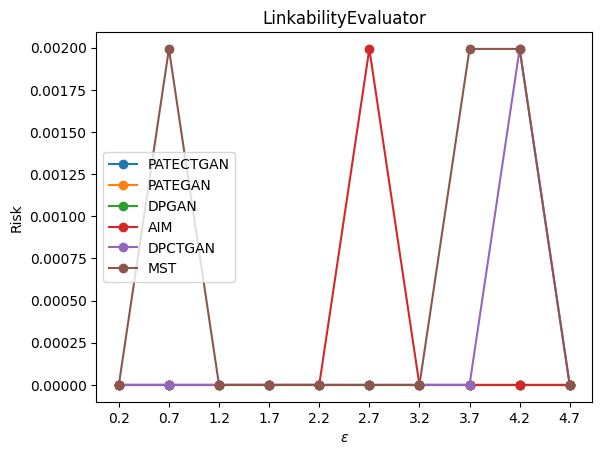

In [12]:
#From json to pandas
attack_results_df = pd.DataFrame(attack_results)
attack_results_df=attack_results_df.sort_index()
# data_str=attack_results_df.iloc[0][0]
# df=pd.DataFrame(json.loads(data_str))
 
models=list(attack_results_df.columns)
epsilons=list(attack_results_df.index)

# Plot mean lines and fill between upper and lower bounds for each i
attack='LinkabilityEvaluator'
for i in models:
    temp=attack_results_df[i]
    risk_values =[]
    lower_bounds = []
    upper_bounds = []
    for epsilon in epsilons:
        data_str=temp[epsilon]
        data=pd.DataFrame(json.loads(data_str))
        risk_values.append(data['Risk'][attack][0])
        # lower_bounds.append(data['Risk'][attack][1][0])
        # upper_bounds.append(data['Risk'][attack][1][1])
    plt.plot(np.arange(len(risk_values)), risk_values, marker='o', label=i)
    # plt.fill_between(np.arange(len(risk_values)), lower_bounds, upper_bounds, alpha=0.4) 
    # plt.plot(np.arange(len(mean_values[:, i])), mean_values[:, i], marker='o', label=models[i])
    # plt.fill_between(np.arange(len(mean_values[:, i])), lower_bounds[i], upper_bounds[i], alpha=0.4)
    
plt.xlabel(r'$\epsilon$')
plt.xticks(np.arange(len(epsilons)), epsilons)
plt.ylabel('Risk')
plt.title(attack)
plt.legend()
plt.show()

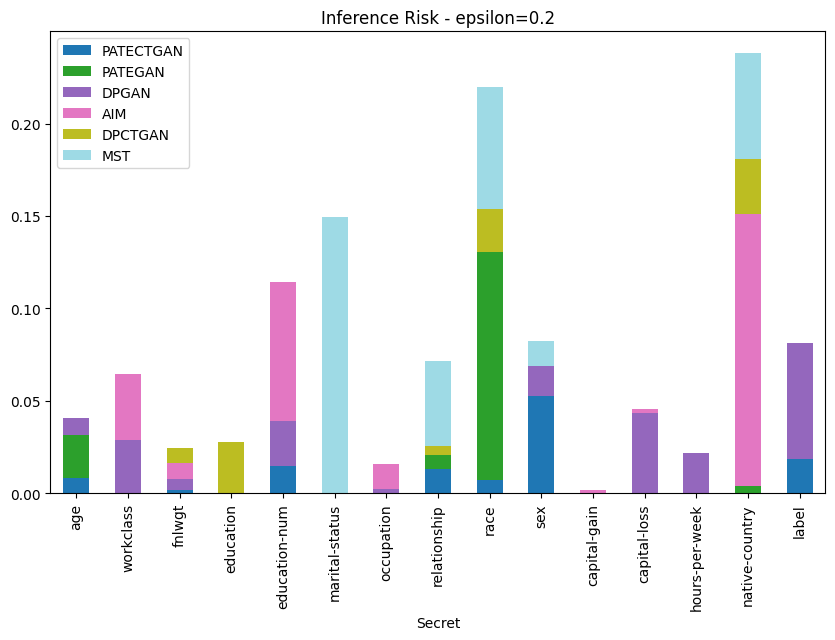

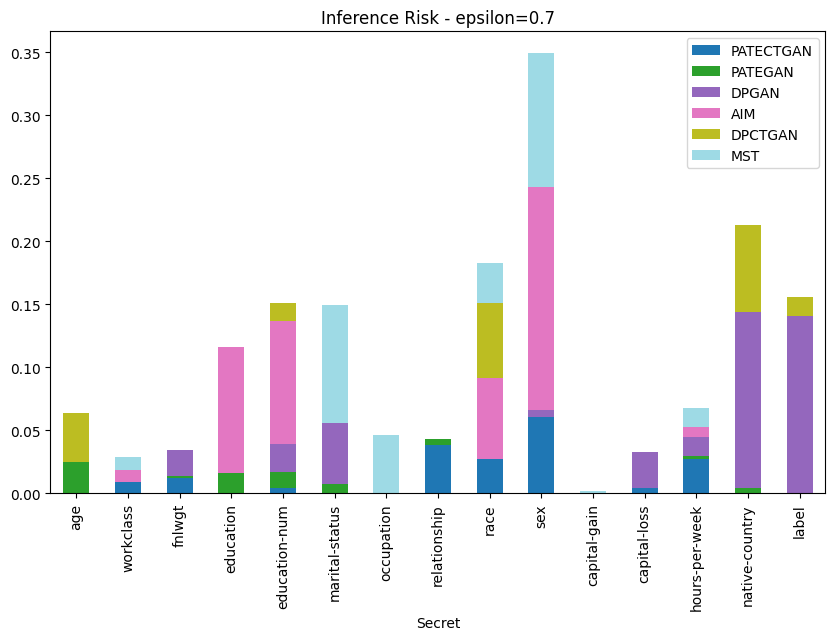

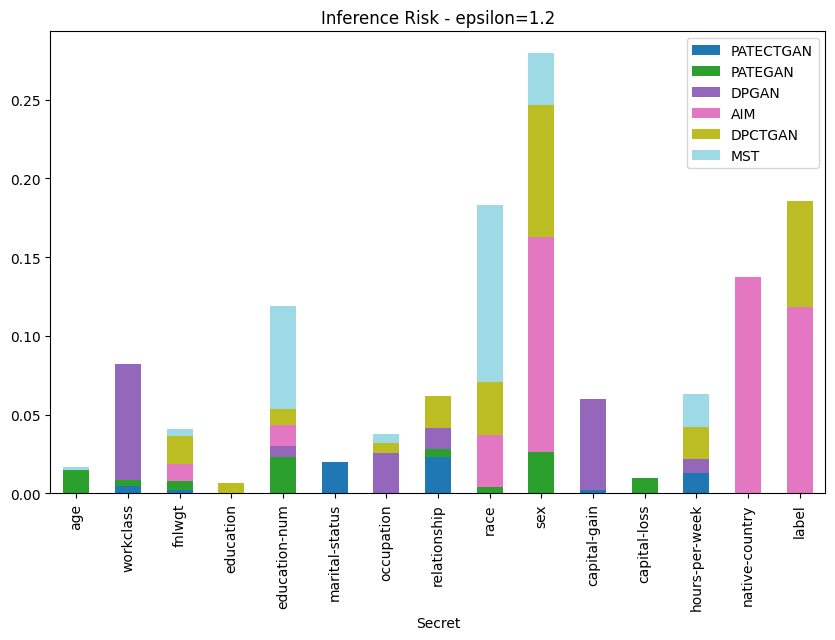

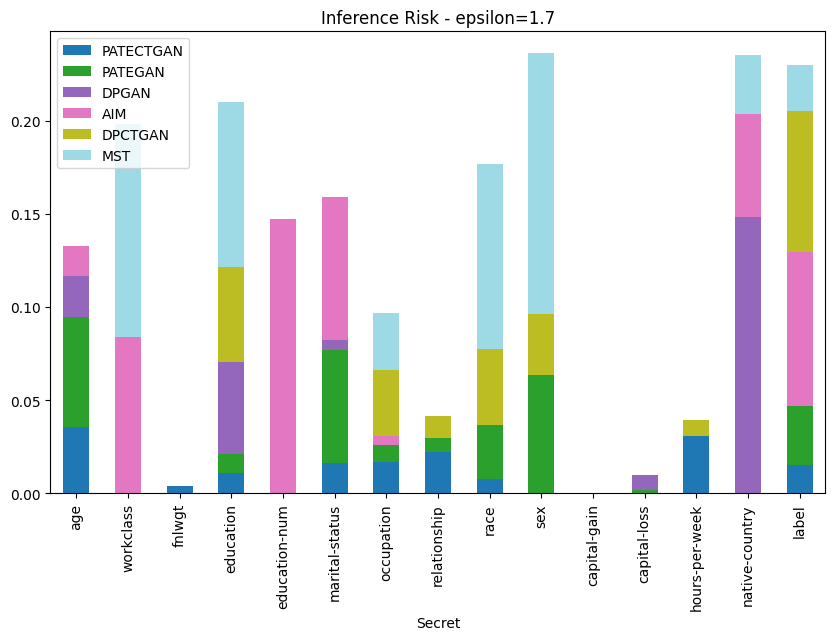

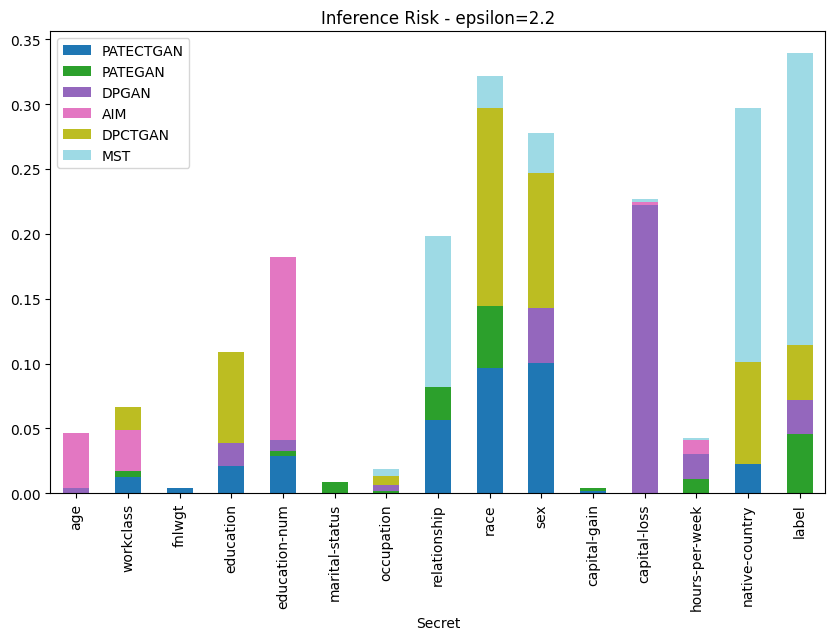

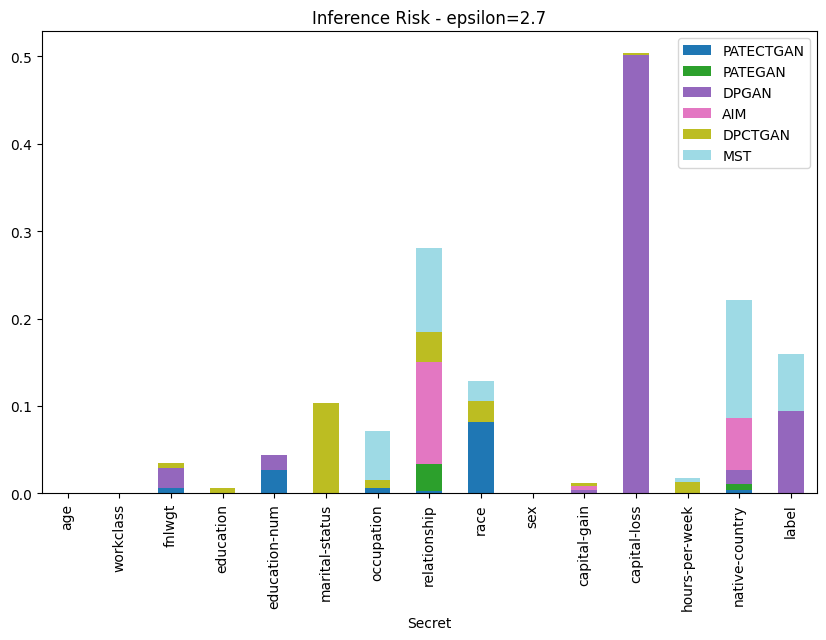

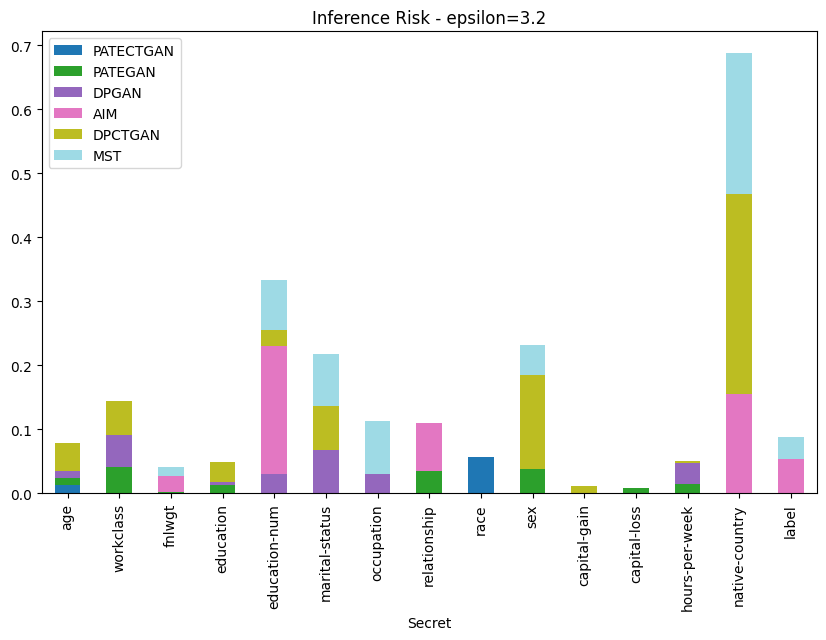

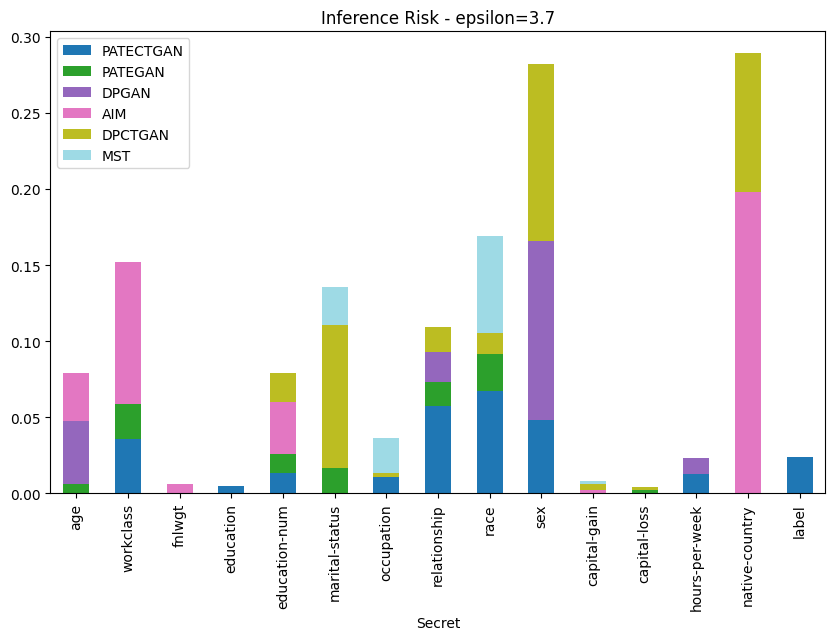

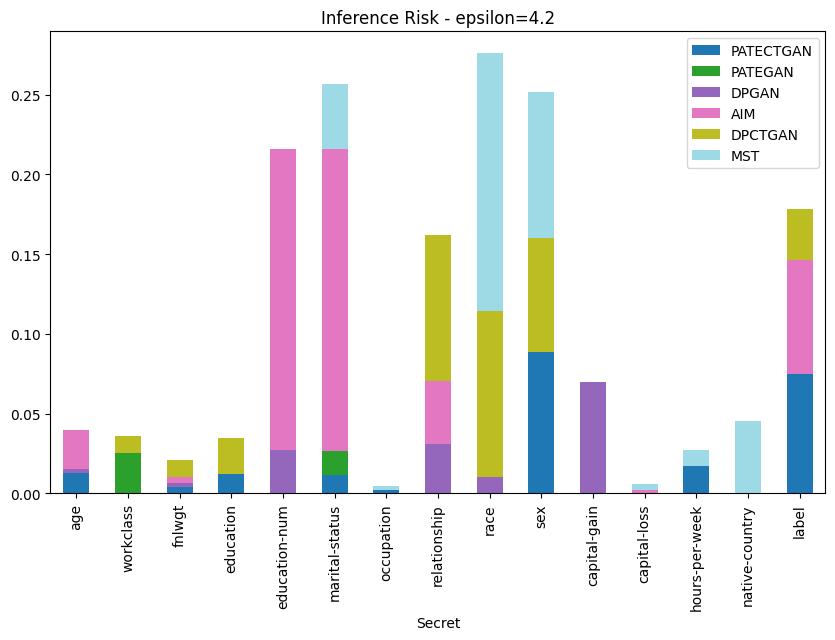

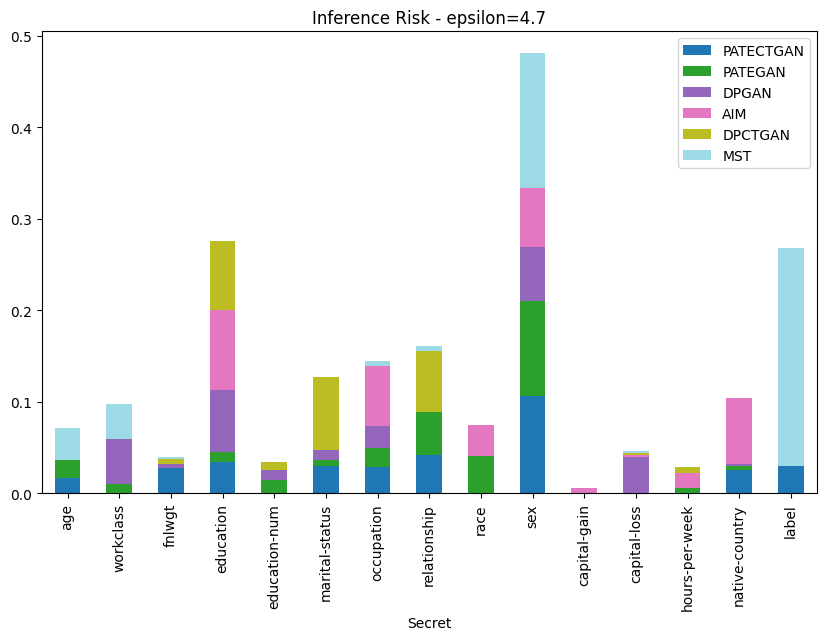

In [49]:
#Processing the inference risk results
#Reading a json file with the results of the attack
import json
with open('hpc_workload/Privacy/results/results_inference.json') as f:
    attack_inference = json.load(f)
#From json to pandas
attack_inference_df = pd.DataFrame(attack_inference)
attack_inference_df=attack_inference_df.sort_index()

models=list(attack_results_df.columns)
epsilons=list(attack_results_df.index)

inference_df_eps={}
for eps in epsilons:
    df=pd.DataFrame()
    for model in models:
        data_str=attack_inference_df[model][eps]
        data=pd.DataFrame(json.loads(data_str))
        df[model]=data['Risk']
    #Set index as the secret
    df.index=data['Secret']
    inference_df_eps[eps]=df
    
#Plotting the inference risk for each epsilon
for eps in epsilons:
    inference_df_eps[eps].plot(kind='bar',figsize=(10,6), stacked=True ,colormap='tab20')
    plt.xticks(rotation=90)
    plt.title('Inference Risk - epsilon='+str(eps))
    plt.show()

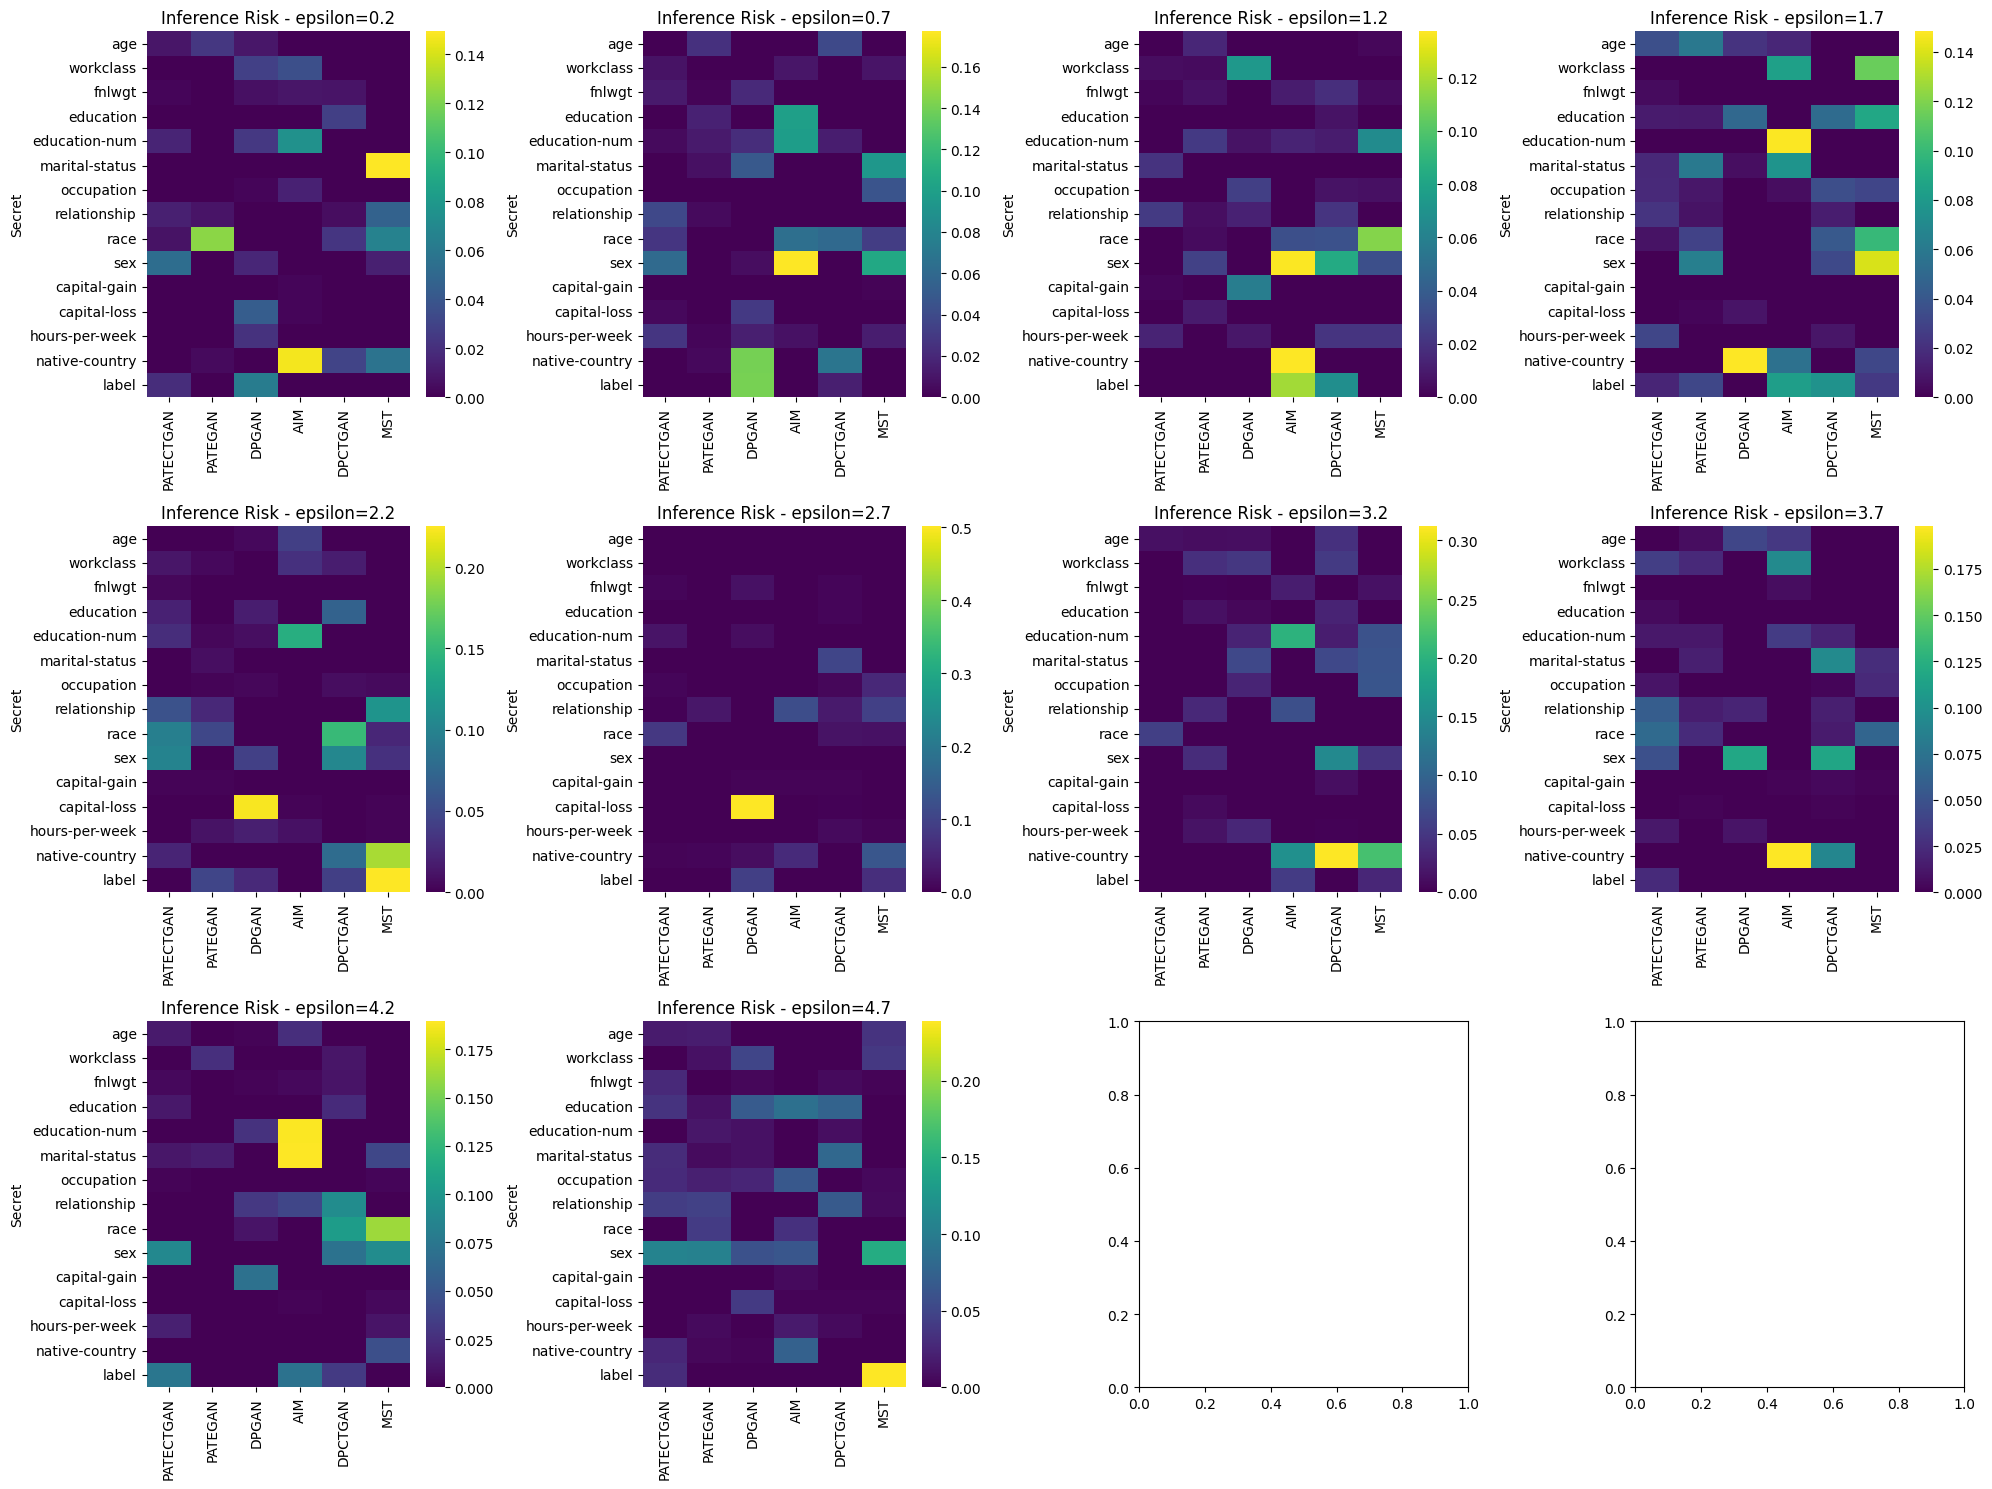

In [50]:
#Make a matrix plot with each dataframe in inference_df_eps
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
for i, eps in enumerate(epsilons):
    sns.heatmap(inference_df_eps[eps], ax=axs[i//4, i%4], cmap='viridis')
    axs[i//4, i%4].set_title('Inference Risk - epsilon='+str(eps))
plt.tight_layout()
plt.show()


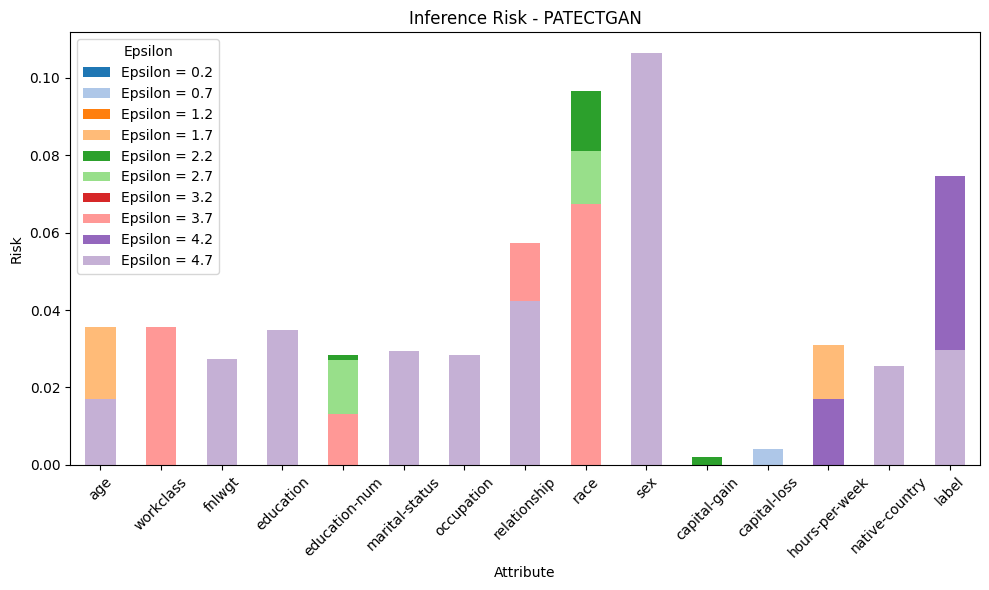

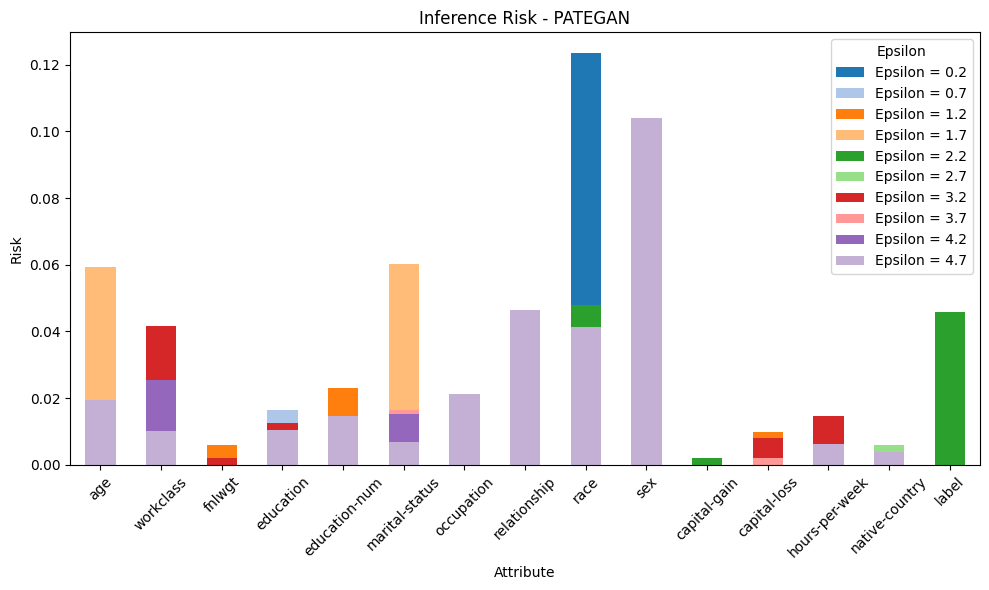

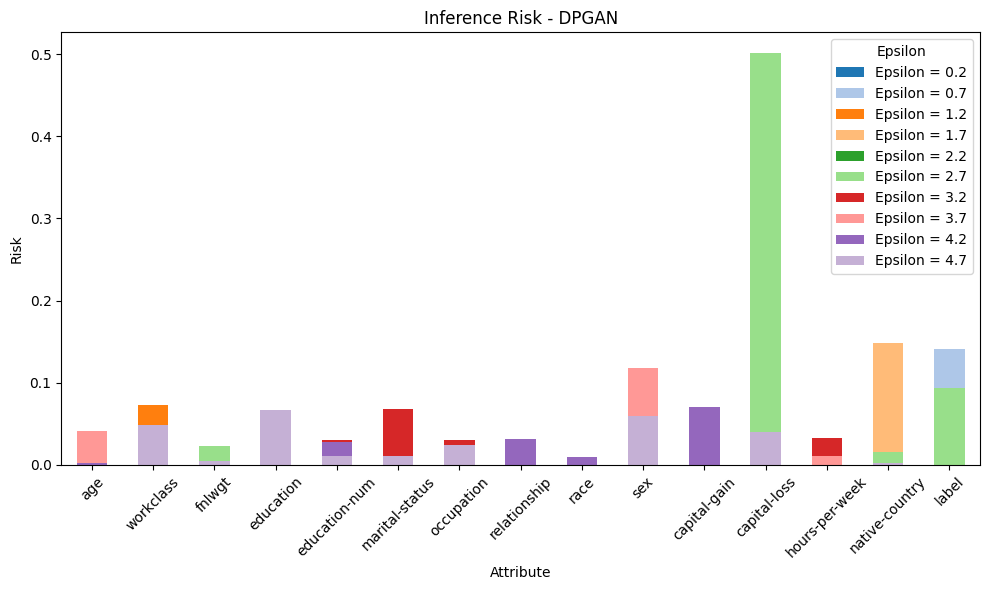

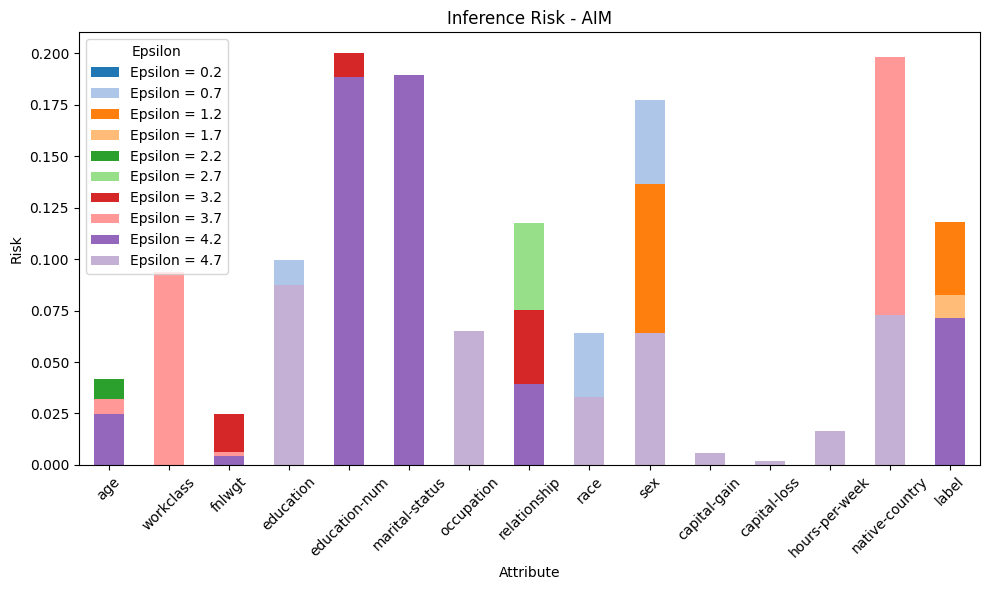

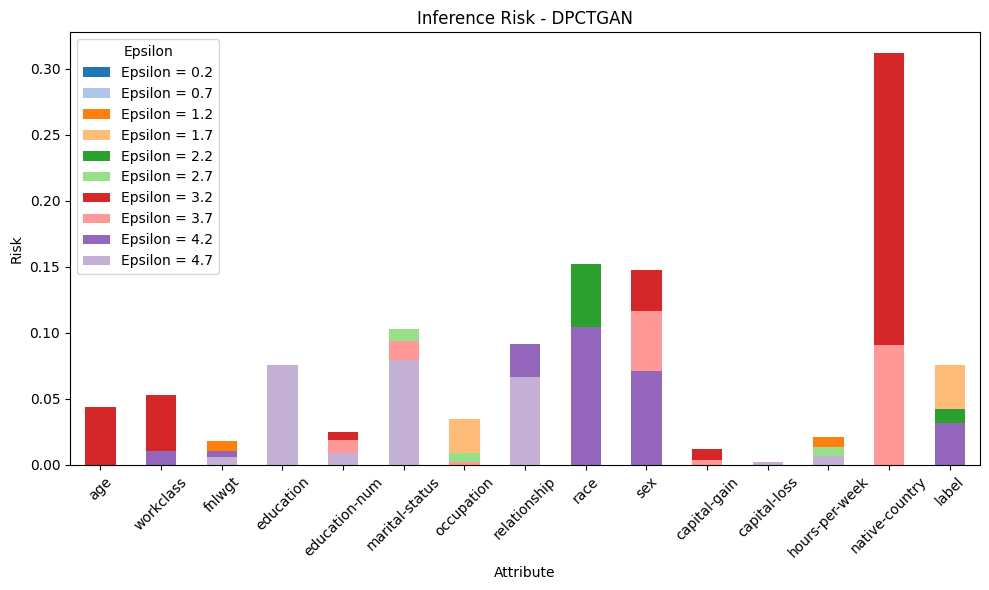

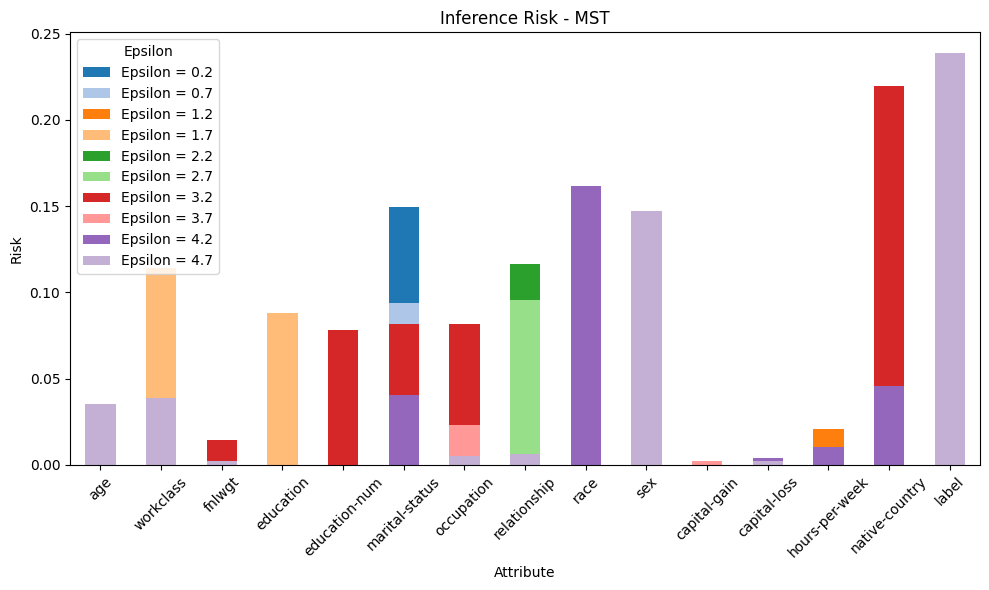

In [57]:
# Define a color palette
palette = sns.color_palette('tab20', len(epsilons))

for model in models:
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, eps in enumerate(epsilons):
        inference_df_eps[eps][model].plot(kind='bar', stacked=True, ax=ax, color=palette[i], label=f'Epsilon = {eps}')
    ax.set_title(f'Inference Risk - {model}')
    ax.set_xlabel('Attribute')
    ax.set_ylabel('Risk')
    ax.legend(title='Epsilon')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()